# ROC and AUC for Evaluation

**good introduction:** https://www.evidentlyai.com/classification-metrics/explain-roc-curve


* “Area Under the Curve” (AUC) of “Receiver Characteristic Operator” (ROC)
* ROC is an evaluation metric for binary classification problems
* it  is a probability curve that plots the TPR against FPR 
    * TPR is true positive rate (recall), often called sensitivity
        * $TPR=TP/(TP+FN)$
    * FPR is false positive rate, often called specifity
        * $FPR = FP/(TN+FP)$
* ROC curve is based on the probability thresholds for class 1 (decision boundary)
    * normally: 0.5 is used
    * but: if precision is focussed on, a higher one might be better

The Area Under the Curve (AUC), the roc score, is the measure of the ability of a classifier to distinguish between the two classes and is used as a summary of the ROC curve.

**given probabilities for class 1 of instances x as well as their class y, 1 or 0**

* y=[1,  0,  1,   0]
* x=[0.75,0.2,0.4,0.6]

* with a threshold of 0.5, we have 1 TP (0.75), 1 TN (0.2), 1 FN (0.4) and 1 FP (0.6)
* with a threshold of 0.2, we have 2 TP (0.75, 0.4) ...

# Example

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate two random dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [2]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=3)

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [3]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, _= roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, _ = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]   # an array of zero
p_fpr, p_tpr, _= roc_curve(y_test, random_probs, pos_label=1)

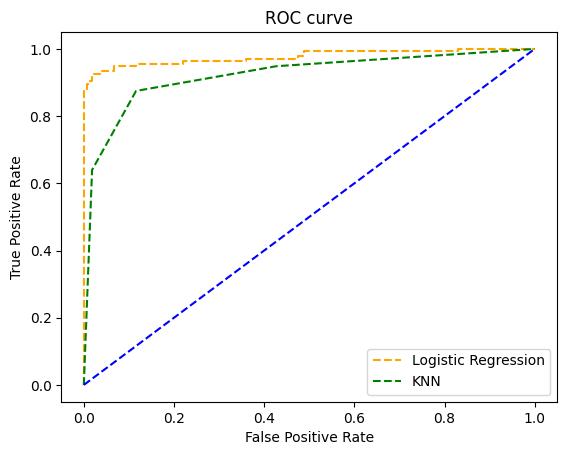

In [4]:
import matplotlib.pyplot as plt

plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [6]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, model1.predict_proba(X_test)[:, 1]),roc_auc_score(y_test, model2.predict_proba(X_test)[:, 1])

(0.9762374461979914, 0.9216956599713055)

# Example: manually compared to sklearn roc_curve


In [7]:
import numpy as np

x=[0.75, 0.2, 0.4, 0.6]
y=[1, 0, 1, 0]

def eval(a,b,c):   # returns precision etc.
    if a+b==0:
        return 0
    return a/(b+c)

fpr,tpr=[],[]
for t in [0.1,0.3,0.5,0.7,0.9]: # 5 thresholds
    
    fn=len([1 for p,l in zip(x,y)  if p < t and l==1]) # below the threshold, but the true label is 1
    fp=len([1 for p,l in zip(x,y)  if p > t and l==0])
    tn=len([1 for p,l in zip(x,y)  if p < t and l==0])
    tp=len([1 for p,l in zip(x,y)  if p > t and l==1])

    rec=tpr3=eval(tp,tp,fn) 
    fpr3=eval(fp,tn,fp) 

    prec=eval(tp,tp,fp)
    f=eval(2*(prec*rec),prec,rec)
    
    print("threshold=",t,"\tfpr=",fpr3,"\trec (tpr)=",tpr3,"\tprec=",prec,"\tf1-score=",f)
    fpr.append(fpr3)
    tpr.append(tpr3)

fpr.reverse()
tpr.reverse()
print("\n our computation:",fpr,tpr)

# with sklearn
fpr2, tpr2, _ = roc_curve(y, x)
print("\n sklearn computation:",fpr2,tpr2)

threshold= 0.1 	fpr= 1.0 	rec (tpr)= 1.0 	prec= 0.5 	f1-score= 0.6666666666666666
threshold= 0.3 	fpr= 0.5 	rec (tpr)= 1.0 	prec= 0.6666666666666666 	f1-score= 0.8
threshold= 0.5 	fpr= 0.5 	rec (tpr)= 0.5 	prec= 0.5 	f1-score= 0.5
threshold= 0.7 	fpr= 0.0 	rec (tpr)= 0.5 	prec= 1.0 	f1-score= 0.6666666666666666
threshold= 0.9 	fpr= 0.0 	rec (tpr)= 0 	prec= 0 	f1-score= 0

 our computation: [0.0, 0.0, 0.5, 0.5, 1.0] [0, 0.5, 0.5, 1.0, 1.0]

 sklearn computation: [0.  0.  0.5 0.5 1. ] [0.  0.5 0.5 1.  1. ]


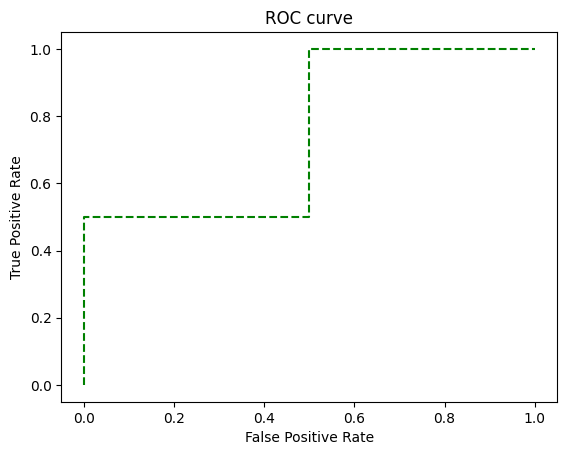

In [8]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, linestyle='--',color='green')
plt.savefig('ROC',dpi=300)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show();

In [ ]:
y=[1,0,1,0]
x=[0.75,0.2,0.4,0.6]

# Interpretation

* tpr==fpr means random guessing (cannot discriminate between the classes, same number of true and false positives)
* a ROC AUC score above 0.8 is considered good, while a score above 0.9 is considered great

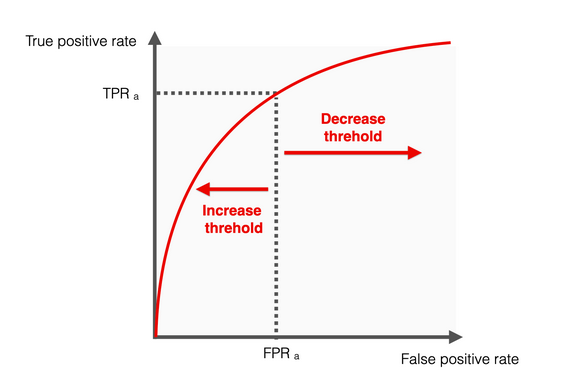

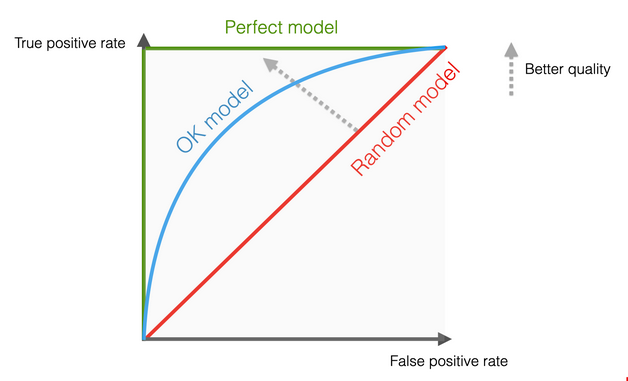

source of depictions:  https://www.evidentlyai.com/classification-metrics/explain-roc-curve